<a href="https://colab.research.google.com/github/Tuan19146029/Tuan19146029/blob/main/Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [10]:
train_path = '/content/drive/MyDrive/TienGiayVN'
valid_path = '/content/drive/MyDrive/TienGiayVN'
test_path = '/content/drive/MyDrive/TienGiayVN'

In [11]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(train_path, target_size=(224, 224),
                                                  batch_size=10, class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(valid_path, target_size=(224, 224),
                                                      batch_size=10, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 2019 images belonging to 10 classes.
Found 2019 images belonging to 10 classes.
Found 2019 images belonging to 10 classes.


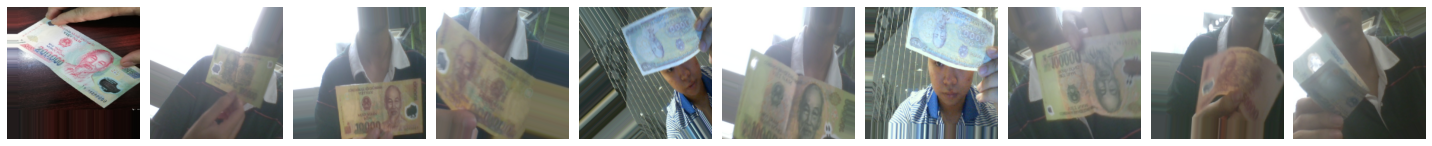

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [12]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [13]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 256)     147712    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=validation_batches,
          validation_steps=len(validation_batches), epochs=20, verbose=1)

Epoch 1/20
202/202 [==============================] - 64s 316ms/step - loss: 0.1657 - accuracy: 0.9495 - val_loss: 0.1243 - val_accuracy: 0.9604
Epoch 2/20
202/202 [==============================] - 63s 314ms/step - loss: 0.1961 - accuracy: 0.9396 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 3/20
202/202 [==============================] - 64s 316ms/step - loss: 0.1307 - accuracy: 0.9564 - val_loss: 0.0431 - val_accuracy: 0.9856
Epoch 4/20
202/202 [==============================] - 64s 317ms/step - loss: 0.1925 - accuracy: 0.9425 - val_loss: 0.0965 - val_accuracy: 0.9757
Epoch 5/20
202/202 [==============================] - 64s 315ms/step - loss: 0.1185 - accuracy: 0.9629 - val_loss: 0.0308 - val_accuracy: 0.9901
Epoch 6/20
202/202 [==============================] - 63s 313ms/step - loss: 0.1372 - accuracy: 0.9574 - val_loss: 0.0725 - val_accuracy: 0.9812
Epoch 7/20
202/202 [==============================] - 64s 315ms/step - loss: 0.1733 - accuracy: 0.9475 - val_loss: 0.0425 - val_ac

In [16]:
model.save('/content/drive/MyDrive/Face/Train_Tien.h5')

In [23]:
classes = ['100k','10k','500k','200k','20k','2k','500VND','1k','50k','5k']


Saving 0001.png to 0001 (1).png
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
dự đoán:  1k


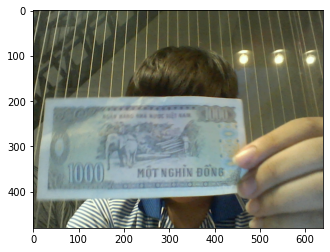

In [24]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=200000)
  print(y_predict)
  print('dự đoán: ', classes[np.argmax(y_predict)])